In [2]:
def hanoi(n, fromPeg , viaPeg, toPeg):
    if n==0: pass
    else:
        hanoi(n-1, fromPeg, toPeg, viaPeg) # n-1개 원판을 from -> via로 이동
        print(f"{fromPeg} -> {toPeg}") # 가장 큰 원판을 from -> to로 이동
        hanoi(n-1, viaPeg, fromPeg, toPeg) # n-1개 원판을 via -> to로 이동
if __name__ == "__main__":
    hanoi(6, 'A', 'B', 'C')

A -> B
A -> C
B -> C
A -> B
C -> A
C -> B
A -> B
A -> C
B -> C
B -> A
C -> A
B -> C
A -> B
A -> C
B -> C
A -> B
C -> A
C -> B
A -> B
C -> A
B -> C
B -> A
C -> A
C -> B
A -> B
A -> C
B -> C
A -> B
C -> A
C -> B
A -> B
A -> C
B -> C
B -> A
C -> A
B -> C
A -> B
A -> C
B -> C
B -> A
C -> A
C -> B
A -> B
C -> A
B -> C
B -> A
C -> A
B -> C
A -> B
A -> C
B -> C
A -> B
C -> A
C -> B
A -> B
A -> C
B -> C
B -> A
C -> A
B -> C
A -> B
A -> C
B -> C


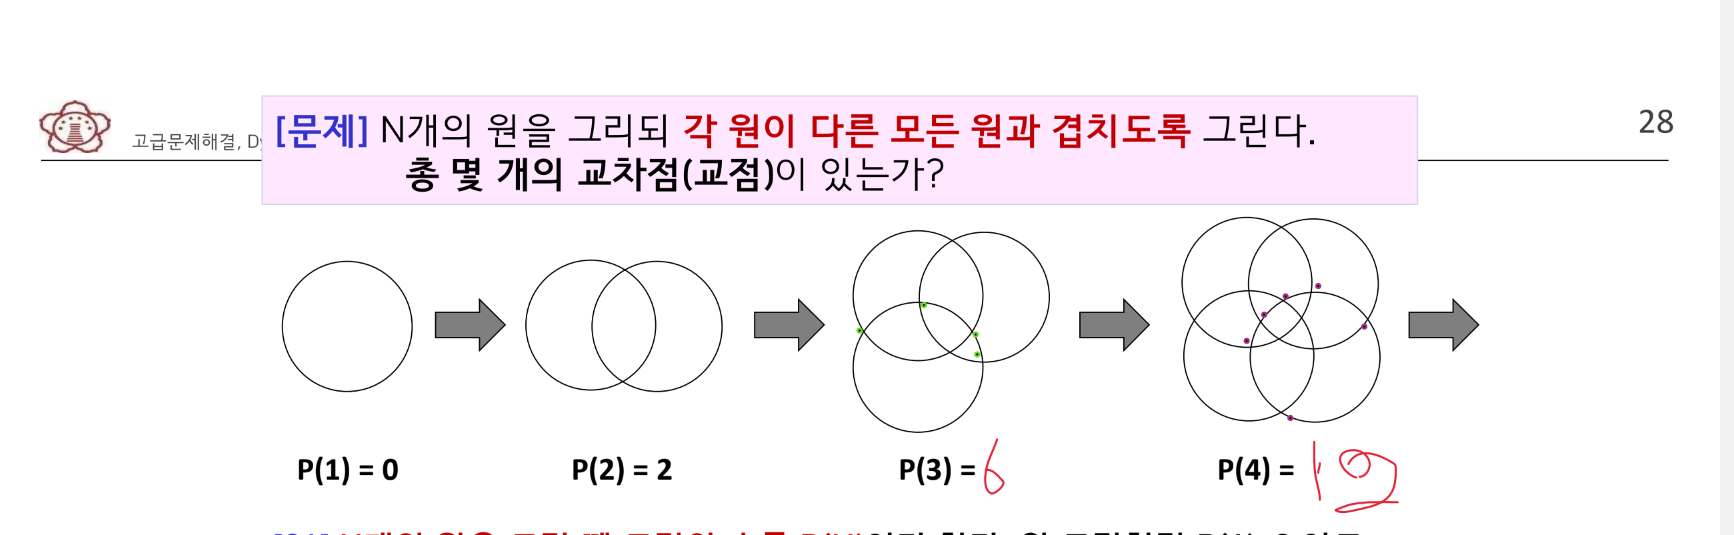

In [12]:
def intersection(n):
    if n==1:
        return 0
    return (n-1)*2 + intersection(n-1)

def intersection2(n):
    return (n-1)*n

for i in range(5,11):
    print(intersection(i), intersection2(i))

20 20
30 30
42 42
56 56
72 72
90 90


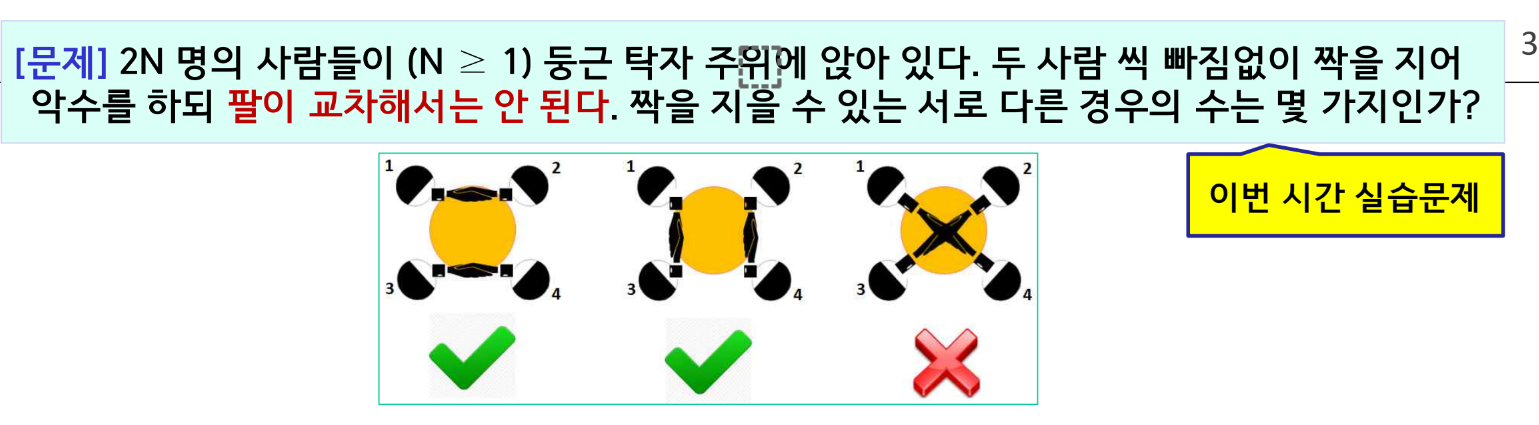

In [37]:
def handshake(n):
    if(n==0):
        return 1
    if(n==1):
        return 1
    result = 0
    for i in range(n):
        result += handshake(n-1-i) * handshake(i)
    return result
handshake(4)

14

In [38]:
def handshake(n):
    dp = [0] * (n+1); dp[0] = 1; dp[1] = 1
    for i in range(2,n+1):
        for j in range(i):
            dp[i] += dp[i-j-1] * dp[j] 
    return dp[n]
handshake(4)

14

In [1]:
def kanpsackSW(maxSize, maxWeight, names, sizes, weights, values):
    '''
    Given a knapsack with maxSize and maxWeight,
    return a 2-tuple, (the max sum of values that fit the knapsack, the corresponding list of items)
    Input:
        maxSize -- size of the knapsack
        maxWeight -- maximum weight of items that the knapsack can carry
        names, sizes, weights, values -- list of item names, sizes, weights, and values
            for example, ['A', 'B'], [1, 2], [5, 4], [1 7] indicates two items,
                (i) 'A' with size 1, weight 5, and value 1                (ii) 'B' with size 2, weight 4, and value 7        
    '''
    assert len(names) == len(sizes) and len(sizes) == len(weights) and len(weights) == len(values), f"names({len(names)}, sizes({len(sizes)}, weights({len(weights)}), and values({len(values)}) must have equal lengths"

    numItems = len(names) # 아이템(짐) 개수
    memo = [for _ in range(maxSize + 1)] # 결과(최적의 가치 합) 저장하는 배열

    for i in range(1, maxSize + 1):
        for j in range(numItems):
            if sizes[j] <= i and memo[i] <= memo[i - sizes[j]] + values[j]:
                memo[i] = memo[i - sizes[j]] + values[j]

    return memo[maxSize] # 마지막에 계산한 값 반환

SyntaxError: invalid syntax (1025164113.py, line 15)

In [2]:
def knapsackSW(maxSize, maxWeight, names, sizes, weights, values):
    # Number of items
    n = len(names)
    
    # Initialize a 3D DP table to store the maximum value that can be achieved
    # considering up to the i-th item, with j available size, and k available weight
    dp = [[[0 for _ in range(maxWeight + 1)] for _ in range(maxSize + 1)] for _ in range(n + 1)]
    
    # For tracking the items that are included in the optimal solution
    item_included = [[[[] for _ in range(maxWeight + 1)] for _ in range(maxSize + 1)] for _ in range(n + 1)]

    # Build the DP table
    for i in range(1, n + 1):
        for j in range(1, maxSize + 1):
            for k in range(1, maxWeight + 1):
                # If the current item's size and weight are less than or equal to j and k, respectively
                if sizes[i-1] <= j and weights[i-1] <= k:
                    # Option 1: Include the current item
                    value_with_item = values[i-1] + dp[i-1][j-sizes[i-1]][k-weights[i-1]]
                    # Option 2: Exclude the current item
                    value_without_item = dp[i-1][j][k]

                    # Choose the better option
                    if value_with_item > value_without_item:
                        dp[i][j][k] = value_with_item
                        item_included[i][j][k] = item_included[i-1][j-sizes[i-1]][k-weights[i-1]] + [names[i-1]]
                    else:
                        dp[i][j][k] = value_without_item
                        item_included[i][j][k] = item_included[i-1][j][k]
                else:
                    # If the current item cannot be included because of its size or weight
                    dp[i][j][k] = dp[i-1][j][k]
                    item_included[i][j][k] = item_included[i-1][j][k]

    # The maximum value is found at dp[n][maxSize][maxWeight]
    # The corresponding list of items is in item_included[n][maxSize][maxWeight]
    return dp[n][maxSize][maxWeight], item_included[n][maxSize][maxWeight]

# Example usage:
maxSize = 5
maxWeight = 10
names = ['A', 'B', 'C']
sizes = [1, 2, 3]
weights = [5, 4, 6]
values = [1, 7, 10]

max_value, items = knapsackSW(maxSize, maxWeight, names, sizes, weights, values)
print(f"Maximum value: {max_value}")
print(f"Items included: {items}")


Maximum value: 17
Items included: ['B', 'C']


In [3]:
def knapsackSW(maxSize, maxWeight, names, sizes, weights, values):
    numItems = len(names)
    # memo 배열 초기화: 각 원소는 (가치합, 마지막에 추가된 아이템의 인덱스)를 저장
    memo = [[(0, None) for _ in range(maxWeight + 1)] for _ in range(maxSize + 1)]

    # 동적 프로그래밍을 사용하여 memo 배열 채우기
    for i in range(1, maxSize + 1):
        for w in range(1, maxWeight + 1):
            for j in range(numItems):
                if sizes[j] <= i and weights[j] <= w:
                    newValue = memo[i - sizes[j]][w - weights[j]][0] + values[j]
                    if newValue > memo[i][w][0]:
                        memo[i][w] = (newValue, j)

    # 최적의 아이템 조합 찾기
    result = []
    s, w = maxSize, maxWeight
    while memo[s][w][1] is not None:
        itemIndex = memo[s][w][1]
        result.append(names[itemIndex])
        s -= sizes[itemIndex]
        w -= weights[itemIndex]

    return memo[maxSize][maxWeight][0], result




P 

In [6]:
sizes = [3, 2, 1, 4, 1]
weights = [2, 1, 3, 2, 1]
values = [12, 10, 20, 15, 5]
names = ['A', 'B', 'C', 'D', 'E']    

if knapsackSW(1, 1, names, sizes, weights, values) == (5, ['E']): print("P ", end='') 
else: 
    print("F ", end='')
    correct = False

if knapsackSW(1, 3, names, sizes, weights, values) == (20, ['C']): print("P ", end='') 
else: 
    print("F ", end='')
    correct = False

if knapsackSW(2, 1, names, sizes, weights, values) == (10, ['B']): print("P ", end='') 
else: 
    print("F ", end='')
    correct = False

v, r = knapsackSW(5, 5, names, sizes, weights, values)
if v == 40: print("P ", end='') 
else: 
    print("F ", end='')
    correct = False

v, r = knapsackSW(8, 10, names, sizes, weights, values)
if v == 70: print("P ", end='') 
else: 
    print("F ", end='')
    correct = False

v, r = knapsackSW(10, 6, names, sizes, weights, values)
if v == 50: print("P ", end='') 
else: 
    print("F ", end='')
    correct = False


P P P P P P 

In [1]:
# 수정필요. 잘 나오지만 공간복잡도 파악이 힘듬